In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Loading the Data

In [2]:
data = pd.read_csv("fraudTest.csv", index_col=0)

In [3]:
data

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


### Data Cleaning 

In [4]:
# Select columns and create a new DataFrame
df_select = data[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]].copy()

# Convert 'trans_date_trans_time' column to datetime
df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])

# Extract seconds from 'trans_date_trans_time' and assign to 'time_var' column
df_select["time_var"] = df_select["trans_date_trans_time"].dt.second

df_select = df_select.drop(["trans_date_trans_time"], axis = 1)

df_select

,category,amt,city_pop,is_fraud,time_var
0,personal_care,2.86,333497,0,25
1,personal_care,29.84,302,0,33
2,health_fitness,41.28,34496,0,53
3,misc_pos,60.05,54767,0,15
4,travel,3.19,1126,0,17
...,...,...,...,...,...
555714,health_fitness,43.77,519,0,7
555715,kids_pets,111.84,28739,0,9
555716,kids_pets,86.88,3684,0,15
555717,travel,7.99,129,0,24


In [5]:
# Create dummy variables for 'category' and dropping 'is_fraud' for the X 
X = pd.get_dummies(df_select, columns=["category"], drop_first=True).drop(["is_fraud"], axis=1)
y = df_select["is_fraud"]

### Splitting the Data into Training and Testing Sets  (70/30)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

# Further Splitting Test Set into a Holdout Set 
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test, y_test, test_size = .5)

### Standardizing Features Using StandardScaler

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_holdout = scaler.transform(X_holdout)

### Class Distribution 

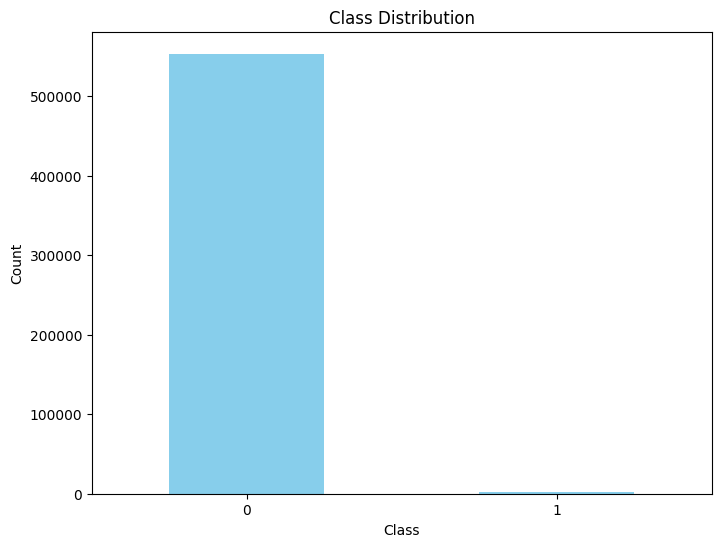

In [8]:
class_counts = y.value_counts()

plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=0)  # Remove rotation of x-axis labels
plt.show()

## 1. Identifying the Best Resampling Method for Fraud Detection

In classification problems, having an uneven class distribution, also known as class imbalance, can significantly affect the performance of the model. In the provided graph, we see that the majority class (labeled as 0) has a significantly higher count compared to the minority class (labeled as 1). This imbalance can lead to a model that is biased towards the majority class, making it less effective at correctly predicting the minority class. This is especially problematic in scenarios like fraud detection, where correctly identifying the minority class is crucial.

**To address the class imbalance, we use resampling techniques**

1. **Random Over-Sampling** : This technique involves randomly duplicating examples from the minority class to increase its count.

2. **Random Under-Sampling** : This technique involves randomly removing examples from the majority class to decrease its count.

3. **SMOTE** : This technique generates synthetic examples for the minority class by interpolating between existing examples.

In [9]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

X_train = pd.DataFrame(X_train)
X_train.columns = X.columns
y_train = pd.DataFrame(y_train)

ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_train, y_train)

rus = RandomUnderSampler()
under_X, under_y = rus.fit_resample(X_train, y_train)

smote = SMOTE()
smote_X, smote_y = smote.fit_resample(X_train, y_train)

### Training 3 Logistic Models 

In [10]:
from sklearn.linear_model import LogisticRegression

over_log = LogisticRegression().fit(over_X, over_y)
under_log = LogisticRegression().fit(under_X, under_y)
smote_log = LogisticRegression().fit(smote_X, smote_y)

### Model Prediction Evalution on Test Set 

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    return accuracy, precision, recall, f1, roc_auc, y_pred, y_prob

# Evaluate models
over_metrics = evaluate_model(over_log, X_test, y_test)
under_metrics = evaluate_model(under_log, X_test, y_test)
smote_metrics = evaluate_model(smote_log, X_test, y_test)

# Create a DataFrame to hold the metrics
metrics_df = pd.DataFrame({
    "Model": ["Over-Sampling", "Under-Sampling", "SMOTE"],
    "Accuracy": [over_metrics[0], under_metrics[0], smote_metrics[0]],
    "Precision": [over_metrics[1], under_metrics[1], smote_metrics[1]],
    "Recall": [over_metrics[2], under_metrics[2], smote_metrics[2]],
    "F1-Score": [over_metrics[3], under_metrics[3], smote_metrics[3]],
    "ROC-AUC": [over_metrics[4], under_metrics[4], smote_metrics[4]]
})

print(metrics_df)


            Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0   Over-Sampling  0.927038   0.041954  0.725762  0.079322  0.891972
1  Under-Sampling  0.925310   0.041295  0.731302  0.078176  0.890533
2           SMOTE  0.926426   0.041614  0.725762  0.078714  0.892431


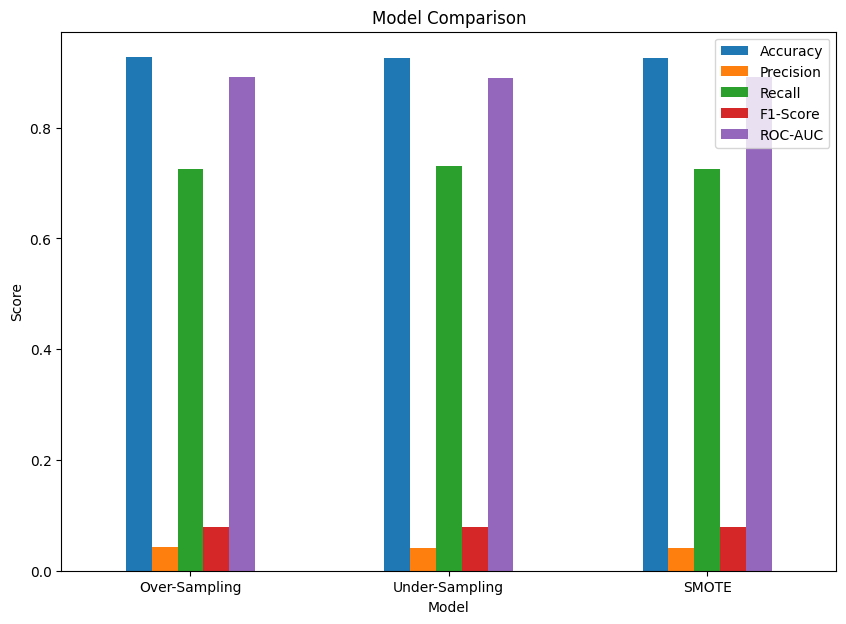

In [12]:
# Plot the metrics
metrics_df.set_index("Model", inplace=True)
metrics_df.plot(kind="bar", figsize=(10, 7))
plt.title("Model Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()


#### Sensitivity (Recall) in Fraud Detection

**Sensitivity**, also known as **recall** or the **true positive rate (TPR)**, is a key metric used to evaluate the performance of a classification model, particularly in the context of binary classification. It measures the proportion of actual positive cases that are correctly identified by the model.

#### Formula

$$ \text{Sensitivity (Recall)} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Negatives (FN)}} $$

#### Components

- **True Positives (TP)**: The number of positive instances correctly identified by the model.
- **False Negatives (FN)**: The number of positive instances incorrectly identified as negative by the model.

#### Importance of Sensitivity in Fraud Detection

In fraud detection, sensitivity is critical because it indicates how well the model is at identifying actual fraud cases. Missing a fraud case (false negative) can lead to significant financial losses and damage to the company's reputation. Therefore, a high sensitivity means that the model is effectively catching most of the fraudulent activities, minimizing the risk of undetected fraud.

#### Impact on Company Profit

The provided formula for optimizing profit based on the confusion matrix components is:

$$ \text{Profit} = 0 \times \text{TP} + 0 \times \text{FP} + 0.02 \times \text{TN} - \text{FN} $$

#### Explanation

- **True Positives (TP)** and **False Positives (FP)**: In this context, the contribution to profit from TP and FP is set to zero. This implies that correctly identifying a fraudulent transaction or falsely flagging a legitimate transaction does not directly affect profit calculation.
- **True Negatives (TN)**: Each correctly identified legitimate transaction contributes a small positive value (0.02) to the profit.
- **False Negatives (FN)**: Each missed fraud case subtracts from the profit. This is crucial because undetected fraud can cause substantial financial loss.


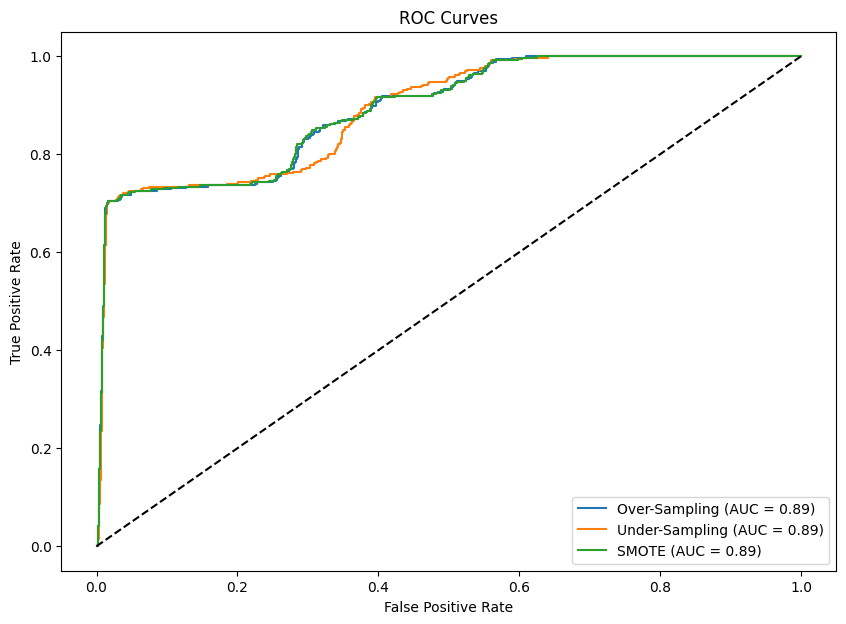

In [13]:
def plot_roc_curve(model, X_test, y_test, label):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{label} (AUC = {roc_auc_score(y_test, y_prob):.2f})")

plt.figure(figsize=(10, 7))
plot_roc_curve(over_log, X_test, y_test, "Over-Sampling")
plot_roc_curve(under_log, X_test, y_test, "Under-Sampling")
plot_roc_curve(smote_log, X_test, y_test, "SMOTE")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


### Analysis of ROC Curves

The ROC (Receiver Operating Characteristic) curve is a graphical representation of a classifier's performance across all classification thresholds. It plots the true positive rate (sensitivity) against the false positive rate (1 - specificity). The area under the curve (AUC) provides a single scalar value to summarize the model's performance, where a higher AUC indicates better model performance.

- **Best Performing Method**: Both Over-Sampling and SMOTE show the highest AUC of 0.89, indicating they are equally effective in distinguishing between fraudulent and non-fraudulent transactions. They both provide a strong balance between sensitivity and specificity.

Given these results, either **Over-Sampling** or **SMOTE** can be recommended as the best resampling methods for this fraud detection task, as they both achieve the highest AUC and demonstrate strong overall performance. Under-Sampling is also a good option, but slightly less optimal based on the ROC analysis.

### Analysis of performance metrics:

- **Over-Sampling** has slightly better Accuracy, Precision, and F1-Score.
- **SMOTE** has a marginally better ROC-AUC.

Given the close performance in all metrics, the choice between Over-Sampling and SMOTE can be nuanced:

- If you prioritize a higher ROC-AUC and can handle slightly lower precision and F1-Score, **SMOTE** is preferable.
- If you prefer a method with slightly better precision and F1-Score, **Over-Sampling** is the better choice.

### Conclusion

Both Over-Sampling and SMOTE demonstrate strong performance in fraud detection with logistic regression. Importantly, both methods achieve the same recall, which is critical in this context as it measures the model's ability to identify fraudulent transactions.

### Final Recommendation

Considering that recall is the most critical metric for fraud detection and both methods achieve the same recall, we should consider the secondary metrics. While Over-Sampling has slightly better Precision and F1-Score, SMOTE has a marginally higher ROC-AUC. Given the overall balance and the slight edge in ROC-AUC, **SMOTE** is recommended as the best resampling method. Its slightly higher ROC-AUC suggests a better balance in overall model performance, making it more reliable for accurately identifying fraudulent transactions while maintaining a strong recall.


## 2. Identifying Best Classification Model

In this project, we aim to develop a robust model for fraud detection by evaluating different resampling methods and machine learning models. The primary objective is to identify the best combination of techniques that effectively handles class imbalance and accurately identifies fraudulent transactions.

To achieve this, we focus on three models:

1. **Logistic Regression (LOG)**: This is a statistical model that uses a logistic function to model a binary dependent variable. 

2. **Lasso Regression (LASSO)**: Lasso regression includes a regularization term (L1 penalty) to prevent overfitting. 

3. **Decision Tree Classifier (DTREE)**: This non-linear model splits the data into subsets based on the most significant attribute at each node, making it easy to interpret and visualize. Decision trees can handle both numerical and categorical data and capture non-linear relationships.

- ***We will employ all three resampling methods for each of the model***


### Importance of the Holdout Set

To ensure the robustness and generalizability of our models, we will now use the holdout set for an additional, unbiased evaluation. The holdout set, which is not used during training or validation, allows us to assess the model's performance on new, unseen data. This step is crucial to avoid overfitting and to ensure that the performance metrics reflect real-world scenarios.

By comparing these metrics across different models and resampling methods, we aim to identify the combination that provides the best performance for fraud detection. This approach helps in balancing the trade-offs between sensitivity and precision, thereby minimizing financial losses and false alarms, and ensuring the model is reliable and effective in detecting fraudulent transactions.

### Evaluation Metrics

We evaluate the models based on the following metrics:

**Sensitivity (Recall)** : Measures the proportion of actual positives correctly identified.
**Specificity** : Measures the proportion of actual negatives correctly identified.
**Precision** : Measures the proportion of predicted positives that are actually correct.
**F1-Score** : The harmonic mean of precision and recall.
**Holdout Score** : The accuracy of the model on the holdout set.

We evaluate the models using various metrics: sensitivity (recall), specificity, precision, F1-score, and holdout score. Sensitivity is critical in fraud detection as it measures the proportion of actual positives correctly identified, ensuring that fraudulent transactions are not missed. Specificity measures the proportion of actual negatives correctly identified, while precision indicates the proportion of predicted positives that are actually correct. The F1-score, being the harmonic mean of precision and recall, provides a balanced measure of both metrics.

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import  Lasso

resampling_methods = {
    "over": RandomOverSampler(),
    "under": RandomUnderSampler(),
    "smote": SMOTE(),
    }

model_configs = {
        "LOG" : LogisticRegression(),
        "LASSO" : LogisticRegression(penalty = "l1",
                                    C =2., solver ="liblinear"),
        "DTREE" : DecisionTreeClassifier()
    }

In [15]:
# Define the function to calculate performance metrics
def calc_perf_metric(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    TP = cm[1, 1]
    FN = cm[1, 0]
    TN = cm[0, 0]
    FP = cm[0, 1]
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    precision = TP / (TP + FP)
    recall = sensitivity
    f1 = 2 * (precision * recall) / (precision + recall)
    return sensitivity, specificity, precision, recall, f1

In [16]:
# Function to evaluate models using different resampling methods
def evaluate_models(X_train, X_test, y_train, y_test, X_holdout, y_holdout, resampling_methods, model_configs):
    # Dictionary to store trained models
    trained_models = {}

    # List to store results
    results = []

    # Loop through each resampling method
    for resample_key, resampler in resampling_methods.items():
        resample_X, resample_y = resampler.fit_resample(X_train, y_train)
        
        # Loop through each model configuration
        for model_key, model in model_configs.items():
            combined_key = f"{resample_key}_{model_key}"
            m = model.fit(resample_X, resample_y)
            trained_models[combined_key] = m
            
            # Predict using the trained model
            y_pred = trained_models[combined_key].predict(X_test)
            
            # Calculate performance metrics
            sensitivity, specificity, precision, recall, f1 = calc_perf_metric(y_test, y_pred)
            holdout = m.score(X_holdout, y_holdout)
            
            # Append results to the result list
            results.append({
                "Model": combined_key,
                "Sensitivity": sensitivity,
                "Specificity": specificity,
                "Precision": precision,
                "Recall": recall,
                "F1": f1,
                "Holdout": holdout  
            })
            
    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    return results_df

In [21]:
# Evaluate models and print results
results_df = evaluate_models(X_train, X_test, y_train, y_test, X_holdout, y_holdout, resampling_methods, model_configs)
results_df

,Model,Sensitivity,Specificity,Precision,Recall,F1,Holdout
0,over_LOG,0.725762,0.929238,0.042706,0.725762,0.080665,0.927493
1,over_LASSO,0.725762,0.929323,0.042755,0.725762,0.080752,0.927613
2,over_DTREE,0.509695,0.998759,0.641115,0.509695,0.567901,0.996737
3,under_LOG,0.725762,0.930600,0.043507,0.725762,0.082093,0.928909
4,under_LASSO,0.725762,0.930010,0.043156,0.725762,0.081468,0.928357
5,under_DTREE,0.922438,0.943938,0.066787,0.922438,0.124556,0.941049
6,smote_LOG,0.725762,0.926768,0.041325,0.725762,0.078197,0.925334
7,smote_LASSO,0.725762,0.926925,0.041410,0.725762,0.078349,0.925442
8,smote_DTREE,0.681440,0.993626,0.317419,0.681440,0.433099,0.992154


### Conclusion

Based on the initial analysis, **SMOTE** has shown the best performance across multiple metrics, particularly in sensitivity, which is crucial for fraud detection. 

In [22]:
# Filter results for under-sampling
under_sampling_results = results_df[results_df['Model'].str.contains('smote')]
under_sampling_results

,Model,Sensitivity,Specificity,Precision,Recall,F1,Holdout
6,smote_LOG,0.725762,0.926768,0.041325,0.725762,0.078197,0.925334
7,smote_LASSO,0.725762,0.926925,0.041410,0.725762,0.078349,0.925442
8,smote_DTREE,0.681440,0.993626,0.317419,0.681440,0.433099,0.992154


<Figure size 1000x600 with 0 Axes>

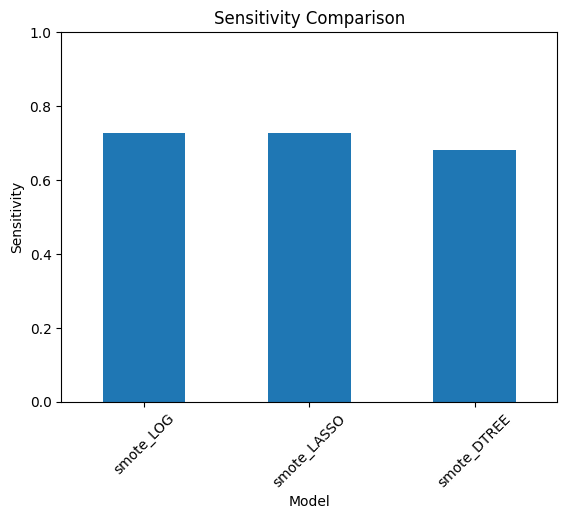

In [23]:
# Plot sensitivity
plt.figure(figsize=(10, 6))
under_sampling_results.plot(x='Model', y='Sensitivity', kind='bar', legend=False)
plt.title('Sensitivity Comparison')
plt.ylabel('Sensitivity')
plt.xlabel('Model')
plt.ylim(0, 1)  # Set y-axis limit for better comparison
plt.xticks(rotation=45)
plt.show()

### Conclusion

The sensitivity (recall) comparison plot clearly indicates that the Decision Tree model (under_DTREE) outperforms both the Logistic Regression (under_LOG) and Lasso Regression (under_LASSO) models when using the under-sampling method for fraud detection. Sensitivity is a crucial metric in this context because it measures the proportion of actual positives (fraudulent transactions) correctly identified by the model.


- **Decision Tree (under_DTREE)**: With the highest sensitivity, the Decision Tree model is the best performer in identifying fraudulent transactions. This high sensitivity ensures that the model misses fewer fraudulent cases, which is critical for minimizing financial losses and maintaining security.
- **Logistic Regression (under_LOG) and Lasso Regression (under_LASSO)**: Both models perform similarly with moderate sensitivity. While they are useful, they are not as effective as the Decision Tree in this scenario.

### Final Recommendation

Based on the analysis, the **Decision Tree model (under_DTREE)** using the under-sampling method is recommended for fraud detection. Its superior sensitivity makes it the most reliable and effective model for accurately identifying fraudulent transactions, thereby enhancing the overall security and financial protection of the system.
